In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy import signal
from matplotlib.pyplot import imshow
from PIL import Image
import cv2
from scipy import signal
from scipy.fftpack import fft2, fftshift, ifftshift, ifft2

# Step 1(Image Downloading,GrayScale conversion and Cropping)

In [64]:
new_im=cv2.imread("car.png")

In [66]:
gray = cv2.cvtColor(new_im, cv2.COLOR_BGR2GRAY)

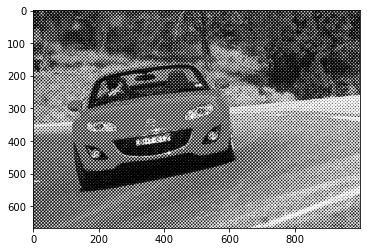

In [68]:
imshow(gray, cmap='gray')

In [2]:
new_im=cv2.imread("car.png",0)# reading the downloaded car image and converting to grayscale 

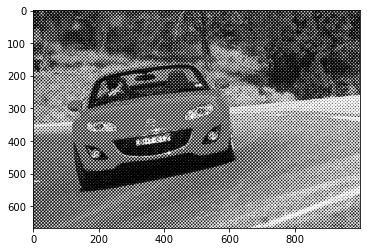

In [3]:
imshow(new_im, cmap='gray')# display image

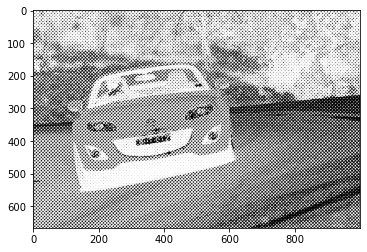

In [63]:
imshow(new_im, cmap='Greys')

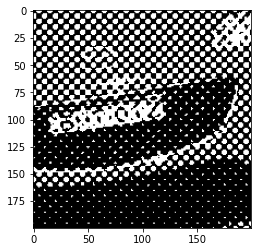

In [4]:
im_with_np = new_im[300:500, 300:500] #Slicing image to get the Number plate as we only require that.
imshow(im_with_np, cmap='gray')

(array([27973.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12027.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

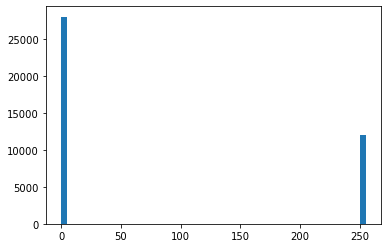

In [5]:
plt.hist(im_with_np.ravel(), bins=50)# checking pixel intensity distribution of the image by generating histogram

In [6]:
#The original image seems to be binarized.

In [7]:
im_with_np.shape

(200, 200)

# Step 2(Fourier Transformation,Frequency Domain and It's Magnitude )

In [8]:
f=np.fft.fft2(im_with_np)#DFT applied

In [9]:
fshift=np.fft.fftshift(f)#Shifting origin to the center

In [10]:
fshift

array([[149685.        +5.91171556e-12j,  14904.65891231+7.21109830e+03j,
          2596.90542681-3.26470481e+03j, ...,
         11608.29195869+1.05738271e+04j,   2596.90542681+3.26470481e+03j,
         14904.65891231-7.21109830e+03j],
       [ -5301.79355796-3.91839328e+04j, -20653.31462989-2.05762546e+04j,
        -16492.1589881 -1.35023362e+04j, ...,
         -1911.98446107+1.45547924e+04j, -11112.93489811+1.50434282e+04j,
        -26356.43881927+2.86859935e+04j],
       [-23627.90490796-6.12021337e+04j,  -4849.00430107+3.15596112e+04j,
         -1483.10622296+1.13968256e+04j, ...,
          9661.54023704-8.77129499e+03j,   5326.97073123+8.53827210e+01j,
          8847.96355366+2.93904917e+03j],
       ...,
       [ -3811.96808646+1.93475366e+04j,   8482.43783947-2.05762969e+03j,
          9649.55359858-9.72009442e+03j, ...,
        -11161.6181904 +6.07969971e+02j, -13123.22087787-1.44870581e+04j,
          6641.91932535-1.78258915e+04j],
       [-23627.90490796+6.12021337e+04j,   8

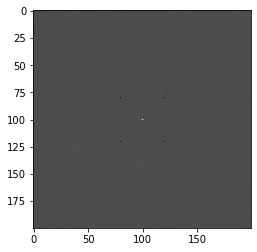

In [11]:
imshow(fshift.real, cmap='gray')#Frequency distribution without taking the magnitude.

In [12]:
# calculate the magnitude of DFT and log scale for the purpose of visualization
magnitude_spectrum=20*np.log(np.abs(fshift))

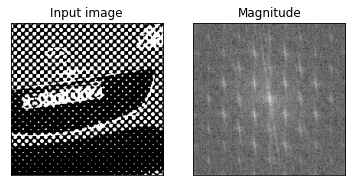

In [13]:
#Visualizing input image and Magnitude. The Peaks in the magnitude image are the periodic noise, which needs to be removed.
plt.subplot(121), plt.imshow(im_with_np, cmap='gray')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude'), plt.xticks([]),plt.yticks([])
plt.show()

In [14]:
from skimage.feature import peak_local_max

# Step 3(Finding Local Maximas of the frequency domain)

In [15]:
# min_distance: Minimum number of pixels separating peaks in a region of 2 * min_distance + 1 (i.e. peaks are separated by at least min_distance).
# To find the maximum number of peaks, use min_distance=1.
# chosing value of min_distance = 19, as with this value we are able to cover all the noise peaks 'necessary' to be removed.
coordinates = peak_local_max(magnitude_spectrum, min_distance=19, exclude_border=0)

In [16]:
coordinates

array([[100, 100],
       [120, 120],
       [ 80,  80],
       [ 80, 120],
       [120,  80],
       [ 60, 100],
       [140, 100],
       [100,  60],
       [100, 140],
       [  0,  80],
       [  0, 120],
       [ 80,   0],
       [120,   0],
       [ 41,  80],
       [159, 120],
       [ 81,  40],
       [119, 160],
       [ 41, 120],
       [159,  80],
       [ 81, 160],
       [119,  40],
       [  0,   0],
       [ 59, 140],
       [141,  60],
       [ 60, 180],
       [140,  20],
       [180,  60],
       [ 20, 140],
       [ 61,  60],
       [139, 140],
       [ 40, 160],
       [160,  40],
       [ 21, 100],
       [179, 100],
       [199,  40],
       [  1, 160],
       [199, 120],
       [140, 180],
       [ 60,  20],
       [  0,  40],
       [180, 140],
       [ 20,  60],
       [101, 180],
       [ 99,  20],
       [ 40,   0],
       [160,   0],
       [179,  20],
       [ 21, 180],
       [199,  80],
       [198,   0],
       [181, 180],
       [ 19,  20],
       [160,

In [17]:
len(coordinates)

55

In [18]:
magnitude_spectrum.size

40000

In [19]:
# we have 55 noise peaks out of 40000 frequency/pixel points

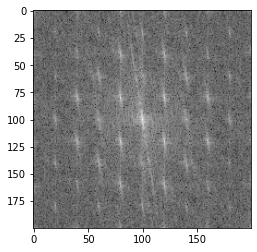

In [20]:
imshow(magnitude_spectrum, cmap='gray')

# Step 4(Setting the value of L)

In [21]:
def clean_img(im,coordinates,magnitude,L):
    dx,dy=np.shape(im)[0], np.shape(im)[1]
    new_fshift=fshift.copy()
    new_mag=magnitude.copy()
    for coord in coordinates:
        i=coord[0]
        j=coord[1]
        if i==dx//2 and j==dy//2:
            continue
        else:    
            for k1 in np.arange(-L,L,1):
                for k2 in np.arange(-L,L,1):
                    if i+k1>=0 and j+k2>=0 and i+k1<dx and j+k2<dy:
                        new_mag[i+k1,j+k2]=0
                        new_fshift[i+k1,j+k2]=0 # shifted DFT of car image               
    imshow(new_mag, cmap='gray')
    plt.title("The size of the neighbourhood is "+str(2*L+1)+"x"+str(2*L+1))
    return new_mag, new_fshift


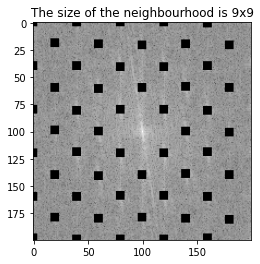

In [22]:
new_mag, new_fshift=clean_img(im_with_np,coordinates,magnitude_spectrum,4)
# chose value of L=4(as this is a big enough radius value for the notch filter to block the neccessary periodic noise).

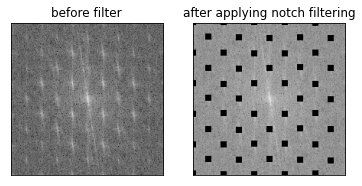

In [23]:
plt.subplot(121), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('before filter'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(new_mag, cmap='gray')
plt.title('after applying notch filtering'), plt.xticks([]),plt.yticks([])
plt.show()

#### we can see that we are able to cover and remove almost all the noise peaks using the notch filtering method we created.

# Step 5(Inverse Fourier Transform)

(Text(0.5, 1.0, 'Image after Notch filtering'), ([], []), ([], []))

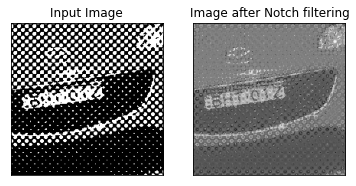

In [24]:
f_ishift = np.fft.ifftshift(new_fshift)#inverse DTF applied
img_back = ifft2(f_ishift)#shifting center back to top-left corner
img_back = img_back.real#extracting real part of the reconstructed image

plt.subplot(121),plt.imshow(im_with_np, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after Notch filtering'), plt.xticks([]), plt.yticks([])

# Step 6(Rescaling the reconstructed image, between intensity range[0-255])

(array([3.000e+00, 5.000e+00, 6.000e+00, 9.000e+00, 2.700e+01, 3.200e+01,
        3.200e+01, 4.000e+01, 6.600e+01, 1.030e+02, 1.930e+02, 4.200e+02,
        5.780e+02, 6.750e+02, 8.440e+02, 1.855e+03, 3.394e+03, 3.848e+03,
        2.806e+03, 2.010e+03, 1.825e+03, 1.695e+03, 1.630e+03, 2.284e+03,
        4.160e+03, 3.795e+03, 1.806e+03, 1.000e+03, 7.640e+02, 7.090e+02,
        6.000e+02, 4.250e+02, 3.480e+02, 2.650e+02, 2.410e+02, 2.500e+02,
        2.080e+02, 2.340e+02, 2.170e+02, 2.120e+02, 1.500e+02, 9.300e+01,
        5.600e+01, 4.100e+01, 3.100e+01, 9.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 2.000e+00]),
 array([-210.29894873, -197.25861881, -184.21828889, -171.17795897,
        -158.13762905, -145.09729913, -132.05696921, -119.01663929,
        -105.97630937,  -92.93597945,  -79.89564953,  -66.85531961,
         -53.81498969,  -40.77465977,  -27.73432985,  -14.69399993,
          -1.65367001,   11.38665991,   24.42698983,   37.46731975,
          50.50764967,   63.54797959

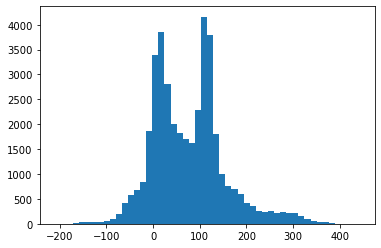

In [25]:
plt.hist(img_back.ravel(), bins=50)

In [26]:
img=(img_back-np.min(img_back))*255.0/(np.max(img_back)-np.min(img_back))

(array([3.000e+00, 5.000e+00, 6.000e+00, 9.000e+00, 2.700e+01, 3.200e+01,
        3.200e+01, 4.000e+01, 6.600e+01, 1.030e+02, 1.930e+02, 4.200e+02,
        5.780e+02, 6.750e+02, 8.440e+02, 1.855e+03, 3.394e+03, 3.848e+03,
        2.806e+03, 2.010e+03, 1.825e+03, 1.695e+03, 1.630e+03, 2.284e+03,
        4.160e+03, 3.795e+03, 1.806e+03, 1.000e+03, 7.640e+02, 7.090e+02,
        6.000e+02, 4.250e+02, 3.480e+02, 2.650e+02, 2.410e+02, 2.500e+02,
        2.080e+02, 2.340e+02, 2.170e+02, 2.120e+02, 1.500e+02, 9.300e+01,
        5.600e+01, 4.100e+01, 3.100e+01, 9.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 2.000e+00]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6,

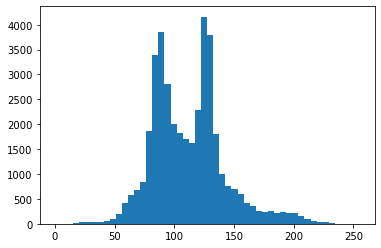

In [51]:
plt.hist(img.ravel(), bins=50)

(Text(0.5, 1.0, 'Image after notch filtering'), ([], []), ([], []))

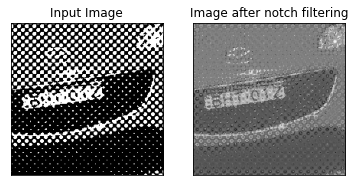

In [27]:
plt.subplot(121),plt.imshow(im_with_np, cmap = 'gray')
plt.title('Input Image before'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img, cmap = 'gray')
plt.title('Image after notch filtering'), plt.xticks([]), plt.yticks([])

# Step 7

# Q) What filter is known for its ability to remove localized noise in the Fourier domain? What mathematical operation have you performed between the magnitude and the filter that you have designed in order to suppress noise?

# ANS) "Notch Filter" has the ability to remove localized noise in Fourier Domain. We have masked the values of all noise peaks(white bright points as located by the peak_local_max() function) in the frequency domain, around the center point with a 4 x 4, zero matrix kernel, to supress the periodic noise.

# Step 8(Post-Processing)

# Q) Have you been able to better see the license plate number in the reconstructed image? What other image quality improvements do you think are needed? 

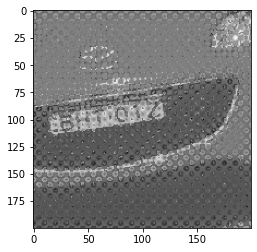

In [28]:
imshow(img, cmap = 'gray')

# Yes we are able to see better and clearer image of the license plate, but further post-processing needs to be done to improve the quality. Post-Processing such as Contrast enhancement can be applied to get  better result.

# Step 9(Applying Gamma Correction and comparing results).

In [29]:
from skimage import exposure

In [30]:
gamma_corrected = exposure.adjust_gamma(img, 2)# applying gamma correction with g=2.

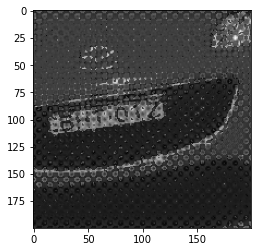

In [31]:
imshow(gamma_corrected, cmap='gray')

(array([1.160e+02, 2.070e+02, 7.370e+02, 1.235e+03, 2.107e+03, 5.166e+03,
        4.680e+03, 2.698e+03, 2.214e+03, 1.892e+03, 1.917e+03, 3.278e+03,
        4.507e+03, 2.559e+03, 1.254e+03, 8.050e+02, 6.360e+02, 6.060e+02,
        5.170e+02, 3.670e+02, 3.040e+02, 2.350e+02, 1.980e+02, 1.740e+02,
        1.670e+02, 1.790e+02, 1.410e+02, 1.700e+02, 1.310e+02, 1.410e+02,
        1.460e+02, 1.300e+02, 1.050e+02, 6.600e+01, 5.400e+01, 4.400e+01,
        3.100e+01, 2.400e+01, 2.100e+01, 1.800e+01, 1.300e+01, 4.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([    0. ,  1300.5,  2601. ,  3901.5,  5202. ,  6502.5,  7803. ,
         9103.5, 10404. , 11704.5, 13005. , 14305.5, 15606. , 16906.5,
        18207. , 19507.5, 20808. , 22108.5, 23409. , 24709.5, 26010. ,
        27310.5, 28611. , 29911.5, 31212. , 32512.5, 33813. , 35113.5,
        36414. , 37714.5, 39015. , 40315.5, 41616. , 42916.5, 44217. ,
        45517.5, 4681

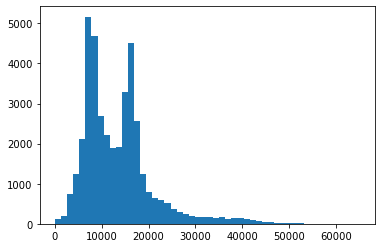

In [32]:
plt.hist(gamma_corrected.ravel(), bins=50)

In [33]:
scaled_gamma_corrected=(gamma_corrected-np.min(gamma_corrected))*255.0/(np.max(gamma_corrected)-np.min(gamma_corrected))

Text(0.5, 1.0, 'after gamma correction')

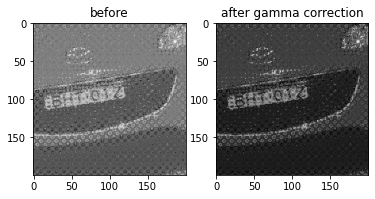

In [50]:
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('before')
plt.subplot(122),plt.imshow(scaled_gamma_corrected, cmap='gray')
plt.title('after gamma correction')

Text(0.5, 1.0, 'after')

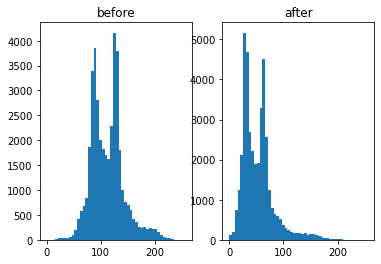

In [35]:
plt.subplot(121),plt.hist(img.ravel(), bins=50)
plt.title('before')
plt.subplot(122),plt.hist(scaled_gamma_corrected.ravel(), bins=50)
plt.title('after')

# After adjusting gamma, number of pixel intensities between 0-100 have increased, while that between 100-255 have decreased, making the Number plate more readable.

In [36]:
#(T,binary_img) = cv2.threshold(img,150,255,cv2.THRESH_BINARY)

In [37]:
#plt.hist(binary_img.ravel(), bins=50)

In [38]:
'''plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('before')
plt.subplot(122),plt.imshow(binary_img, cmap='gray')
plt.title('after')'''

"plt.subplot(121),plt.imshow(img, cmap='gray')\nplt.title('before')\nplt.subplot(122),plt.imshow(binary_img, cmap='gray')\nplt.title('after')"

# Step 10(Contrast Stretching, m is the mid-line where we want to switch from dark to light values. E controls the slope of the function.)

In [39]:
def normalize(intensity, m, E):
    
    I = intensity
    dx,dy = np.shape(intensity)[0], np.shape(intensity)[1]
    eps=0.001
    cs=np.zeros((dx,dy))
    for i in range(dx):
        for j in range(dy):
            cs[i,j]=1/((1+m/(I[i][j]+eps))**E)
    return cs

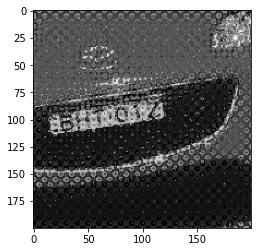

In [61]:
g=normalize(scaled_gamma_corrected,10, 10)# m = 10 and E=10, as per trial error basis.
imshow(g, cmap='gray')

(array([1.823e+03, 1.254e+03, 2.161e+03, 3.182e+03, 3.125e+03, 2.330e+03,
        1.583e+03, 1.280e+03, 1.089e+03, 1.086e+03, 9.540e+02, 9.560e+02,
        9.060e+02, 9.530e+02, 1.293e+03, 1.868e+03, 2.406e+03, 2.436e+03,
        1.692e+03, 1.132e+03, 7.480e+02, 6.110e+02, 4.330e+02, 4.360e+02,
        4.020e+02, 4.240e+02, 4.010e+02, 3.110e+02, 2.540e+02, 2.540e+02,
        2.010e+02, 1.730e+02, 1.720e+02, 1.630e+02, 1.660e+02, 1.590e+02,
        1.780e+02, 1.750e+02, 1.680e+02, 1.840e+02, 1.640e+02, 1.040e+02,
        8.400e+01, 4.800e+01, 3.900e+01, 2.900e+01, 4.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00]),
 array([9.99000550e-41, 1.36136225e-02, 2.72272450e-02, 4.08408675e-02,
        5.44544900e-02, 6.80681125e-02, 8.16817349e-02, 9.52953574e-02,
        1.08908980e-01, 1.22522602e-01, 1.36136225e-01, 1.49749847e-01,
        1.63363470e-01, 1.76977092e-01, 1.90590715e-01, 2.04204337e-01,
        2.17817960e-01, 2.31431582e-01, 2.45045205e-01, 2.58658827e-01,
        2.722724

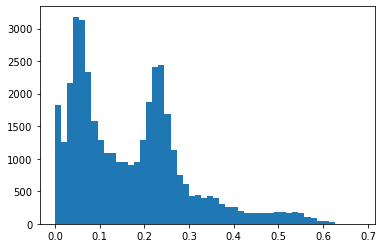

In [41]:
plt.hist(g.ravel(), bins=50)

Text(0.5, 1.0, 'after contrast stretching')

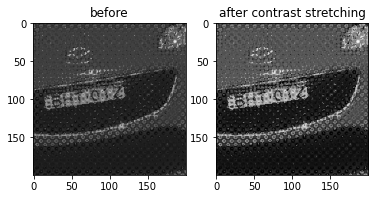

In [49]:
plt.subplot(121),plt.imshow(scaled_gamma_corrected, cmap='gray')
plt.title('before')
plt.subplot(122),plt.imshow(g, cmap='gray')
plt.title('after contrast stretching')

# A better contrast has been achieved as compared to reconstructed image

# Step 11(Image smoothing using averaging filter---->(mean(image, disk(..))))

In [43]:
from skimage.filters.rank import mean
from skimage.morphology import disk
from skimage import img_as_ubyte

(array([1.823e+03, 1.254e+03, 2.161e+03, 3.182e+03, 3.125e+03, 2.330e+03,
        1.583e+03, 1.280e+03, 1.089e+03, 1.086e+03, 9.540e+02, 9.560e+02,
        9.060e+02, 9.530e+02, 1.293e+03, 1.868e+03, 2.406e+03, 2.436e+03,
        1.692e+03, 1.132e+03, 7.480e+02, 6.110e+02, 4.330e+02, 4.360e+02,
        4.020e+02, 4.240e+02, 4.010e+02, 3.110e+02, 2.540e+02, 2.540e+02,
        2.010e+02, 1.730e+02, 1.720e+02, 1.630e+02, 1.660e+02, 1.590e+02,
        1.780e+02, 1.750e+02, 1.680e+02, 1.840e+02, 1.640e+02, 1.040e+02,
        8.400e+01, 4.800e+01, 3.900e+01, 2.900e+01, 4.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6,

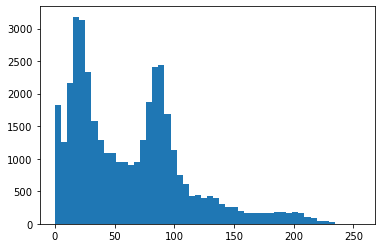

In [44]:
final_image=(g-np.min(g))*255.0/(np.max(g)-np.min(g))
plt.hist(final_image.ravel(), bins=50)

In [45]:
final_image = final_image.astype(np.uint8)

Text(0.5, 1.0, 'after')

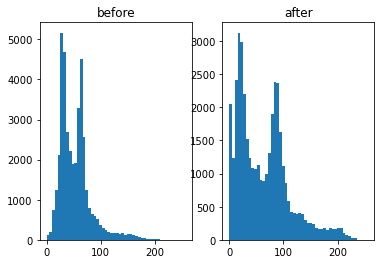

In [69]:
plt.subplot(121),plt.hist(scaled_gamma_corrected.ravel(), bins=50)
plt.title('before')
plt.subplot(122),plt.hist(final_image.ravel(), bins=50)
plt.title('after')

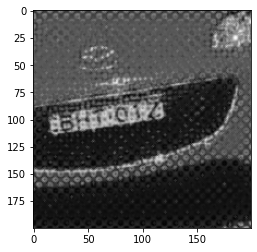

In [46]:
loc_mean = mean(final_image, disk(1))
imshow(loc_mean, cmap='gray')

Text(0.5, 1.0, 'after smoothing')

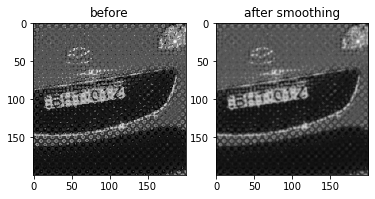

In [48]:
plt.subplot(121),plt.imshow(g, cmap='gray')
plt.title('before')
plt.subplot(122),plt.imshow(loc_mean, cmap='gray')
plt.title('after smoothing')

Text(0.5, 1.0, 'after')

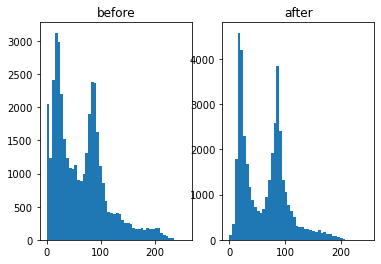

In [70]:
plt.subplot(121),plt.hist(final_image.ravel(), bins=50)
plt.title('before')
plt.subplot(122),plt.hist(loc_mean.ravel(), bins=50)
plt.title('after')

# When running mean(image, disk(..)) mathematically, we are defining a circular kernel of certain radius which when applied to a particular part of the image, returns the local mean value of all those pixels within its range and replaces the pixel values of that region with its local mean value.

# Advantage of  this smoothing filter is that it reduces noise in the image to a further level, but at the same time the drawback is that it blurs the edges of the image.(Bilateral mean filtering is a better option).